# Reprojecting & Clipping
we will learn:
- how to change the CRS of a `gpd.GeoDataFrame` and 
- how to clip different geometries using a polygon. 

## Data
**First dataset**
[TIGER shapefile for US states (and equivalent) from the United States Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341). 

**Second dataset**
[Natural Earth's simple medium scale populated places dataset](https://www.naturalearthdata.com/downloads/50m-cultural-vectors/). 

Download and upload shapefile (choose the one that says "simple (less columns)").

**Third dataset**
[Natural Earth's road dataset](https://www.naturalearthdata.com/downloads/10m-cultural-vectors/roads/). 

## Set up libraries and display options

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# this is our first time using this function
from shapely.geometry import box

In [2]:
# display all column when looking at dataframes
pd.set_option("display.max.columns", None)

## Import data

In [3]:
# states from US Census TIGER files
states = gpd.read_file('data/tl_2022_us_state/tl_2022_us_state.shp')
# make column names small caps
states.columns = states.columns.str.lower()

# populated places from Natural Earth
places = gpd.read_file('data/ne_50m_populated_places_simple/ne_50m_populated_places_simple.shp')

# roads from Natural Earth
roads = gpd.read_file('data/ne_10m_roads/ne_10m_roads.shp')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/share/proj failed


## Prepeare Alaska polygon

### Data exploration
`states` is a geospatial dataset, exploration should include *at least* checking the head of the dataset, plotting the data, and looking at its CRS.

In [4]:
# print the CRS
print(states.crs)

# look at first five columns
states.head(3)

epsg:4269


,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


<AxesSubplot:>

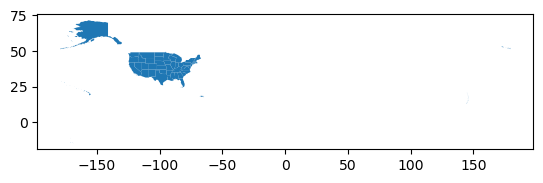

In [5]:
# quick plot
states.plot()

### Selection

We are intersted in plotting data in Alaska. 
Let's select this data:

<AxesSubplot:>

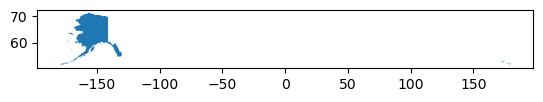

In [6]:
alaska = states[states.name =='Alaska']
alaska.plot()

### Reprojecting
issue: Alaska's islands are elongating the map. 
fix: reproject the Alaska geo-dataframe. 

**Reprojecting** = changing the coordinate reference system of your geospatial data. 

In our case: reproject the Alaska geo-dataframe to the CRS EPSG:3338. 

This CRS is a *projected* CRS, better suited for working with data from Alaska.


Changing CRSs in GeoPandas is simple using the `to_crs()` method for `gpd.GeoDataFrame`s. 
The general syntax is:
```python
updated_geodf = geodf.to_crs(new_crs)
```
where:

- `updated_geodf` is the output of the method, a new geodataframe,
- `geodf` is the `gpd.GeoDataFrame` we want to transform, 
- `new_crs` the CRS we want to convert to: an object of type CRS or string representing the CRS (ex: `'epsg:3338'`), 

In our case:

<AxesSubplot:>

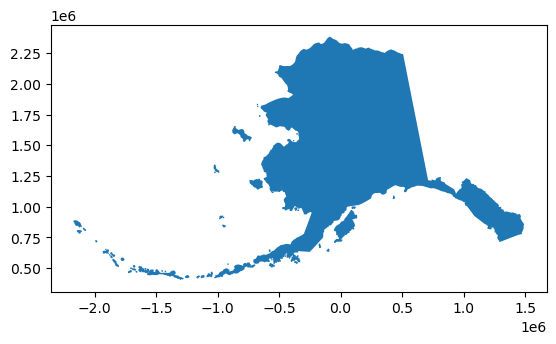

In [7]:
# change to projected CRS optimized for Alaska
alaska = alaska.to_crs('epsg:3338')
alaska.plot()

In [8]:
# check new CRS
print('is this CRS projected? ', alaska.crs.is_projected)
alaska.crs

is this CRS projected?  True


<Projected CRS: EPSG:3338>
Name: NAD83 / Alaska Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Alaska.
- bounds: (172.42, 51.3, -129.99, 71.4)
Coordinate Operation:
- name: Alaska Albers (meters)
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## Prepare populated places

### Exploration 

Let's now explore the populated places data. 

In [9]:
# print the CRS
print(places.crs)

# look at first five columns
places.head(3)

epsg:4326


,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,capin,worldcity,megacity,sov0name,sov_a3,adm0name,adm0_a3,adm1name,iso_a2,note,latitude,longitude,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
0,10,1,5,Admin-1 region capital,Bombo,None,None,Bombo,0,0,None,0,0,Uganda,UGA,Uganda,UGA,Bamunanika,UG,None,0.583299,32.533300,75000,21000,0.0,8,7,None,None,7.0,1159113923,POINT (32.53330 0.58330)
1,10,1,5,Admin-1 region capital,Fort Portal,None,None,Fort Portal,0,0,None,0,0,Uganda,UGA,Uganda,UGA,Kabarole,UG,None,0.671004,30.275002,42670,42670,0.0,7,7,None,None,7.0,1159113959,POINT (30.27500 0.67100)
2,10,1,3,Admin-1 region capital,Potenza,None,None,Potenza,0,0,None,0,0,Italy,ITA,Italy,ITA,Basilicata,IT,None,40.642002,15.798997,69060,69060,0.0,8,8,None,None,7.0,1159117259,POINT (15.79900 40.64200)


<AxesSubplot:>

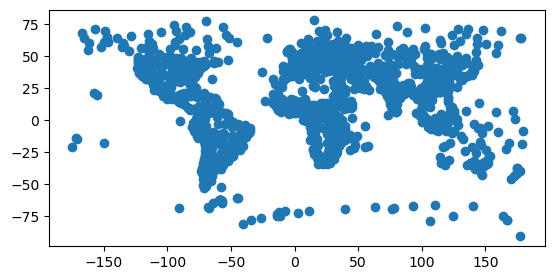

In [10]:
places.plot()

`places` has CRS EPSG:4326, this is the EPSG code for the WGS84 CRS. 
EPSG:4326/WGS84 is the most used CRS for global data.

Let's try to plot `places` and `alaska` together:

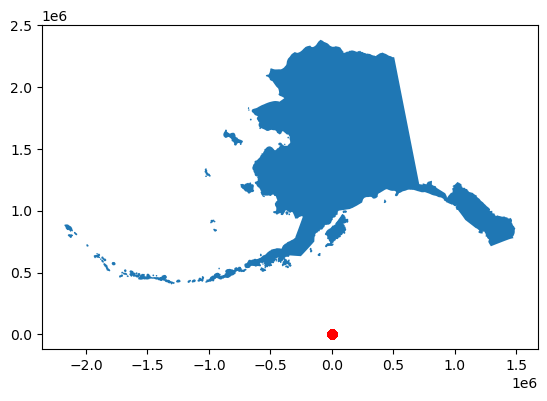

In [11]:
# Trouble
fig, ax = plt.subplots()

alaska.plot(ax=ax)
places.plot(ax=ax, color='red')

plt.show()

This is a classic mistake in geospatial. 
**To plot, analyze, or integrate different geospatial datasets they must have the same CRS**. 

`alaska` and `places` have different CRSs:

In [12]:
print(alaska.crs)
print(places.crs)

epsg:3338
epsg:4326


### Reprojecting

Use `to_crs()` method to reproject `places` into `alaska`'s CRS:

In [13]:
# update crs
places = places.to_crs(alaska.crs)
print(alaska.crs == places.crs)

True


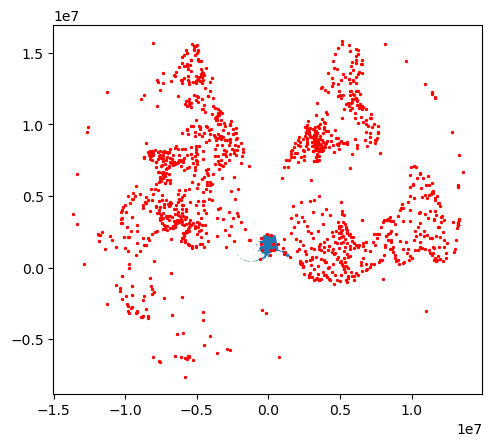

In [14]:
# this is intersting but now we are seeing all Arctic comms
fig, ax = plt.subplots()

alaska.plot(ax=ax)
places.plot(ax=ax, color='red',markersize=2 )

plt.show()

### Clipping

**Clipping** means using a polygon (or polygons) to only select geospatial data within them. 

To clip a `gpd.GeoDataFrame` we can use the geopandas `clip()` function
Syntax:
```python
updated_geodf = gpd.clip(geodf, mask)
```
where:

- `updated_geodf` is the output of the method: the intersection of the geometries in `geodf` with `mask`,
- `geodf` is the `gpd.GeoDataFrame` we want to clip, 
- `mask` is a `gpd.GeoDataFrame` with the polygon(s) we want to use for clipping. This `mask` must be in the same CRS as `geodf`!

In our case:

In [15]:
# clip places to Alaska
ak_places = gpd.clip(places, alaska)
ak_places

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,capin,worldcity,megacity,sov0name,sov_a3,adm0name,adm0_a3,adm1name,iso_a2,note,latitude,longitude,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
764,3,110,1,Populated place,Cold Bay,None,None,Cold Bay,0,0,None,0,0,United States,USA,United States of America,USA,Alaska,US,None,55.200001,-162.715092,200,108,0.0,1,1,None,Cold Bay,5.0,1159150541,POINT (-553201.466 612732.247)
763,3,110,1,Populated place,Kodiak,None,None,Kodiak,0,0,None,0,0,United States,USA,United States of America,USA,Alaska,US,None,57.789998,-152.406987,9461,6148,9122.0,5,5,None,Kodiak,5.0,1159150539,POINT (94470.762 866399.197)
215,4,50,1,Populated place,Sitka,None,None,Sitka,0,0,None,0,0,United States,USA,United States of America,USA,Alaska,US,None,57.060398,-135.327549,8931,7289,0.0,5,5,None,Sitka,5.1,1159149319,POINT (1115512.589 941665.222)
770,3,110,1,Admin-1 capital,Juneau,None,None,Juneau,0,0,None,0,0,United States,USA,United States of America,USA,Alaska,US,None,58.314127,-134.419997,30711,21633,0.0,7,7,None,Juneau,4.0,1159150555,POINT (1128929.841 1090424.979)
765,3,110,1,Populated place,Bethel,None,None,Bethel,0,0,None,0,0,United States,USA,United States of America,USA,Alaska,US,None,60.793303,-161.755796,6228,4653,0.0,5,4,None,Bethel,5.0,1159150543,POINT (-419821.224 1225558.907)
1080,2,200,1,Populated place,Anchorage,None,None,Anchorage,0,0,None,0,0,United States,USA,United States of America,USA,Alaska,US,None,61.219970,-149.900215,260283,243853,0.0,10,10,None,Anchorage,3.0,1159151249,POINT (220064.767 1254886.849)
769,3,110,1,Populated place,Valdez,None,None,Valdez,0,0,None,0,0,United States,USA,United States of America,USA,Alaska,US,None,61.135996,-146.348287,4036,2530,0.0,4,4,None,Valdez,5.0,1159150553,POINT (409805.897 1262980.440)
768,3,110,1,Populated place,Nome,None,None,Nome,0,0,None,0,0,United States,USA,United States of America,USA,Alaska,US,None,64.506100,-165.406374,3485,2557,2450.0,4,4,None,Nome,4.0,1159150551,POINT (-544875.137 1662874.547)
771,3,110,1,Populated place,Fairbanks,None,None,Fairbanks,0,0,None,0,0,United States,USA,United States of America,USA,Alaska,US,None,64.836984,-147.710659,56993,30224,0.0,8,7,None,Fairbanks,4.0,1159150557,POINT (297978.605 1666997.434)
766,3,110,1,Populated place,Point Hope,None,None,Point Hope,0,0,None,0,0,United States,USA,United States of America,USA,Alaska,US,None,68.347726,-166.808020,461,461,0.0,2,2,None,Point Hope,5.0,1159150547,POINT (-529220.980 2094066.281)


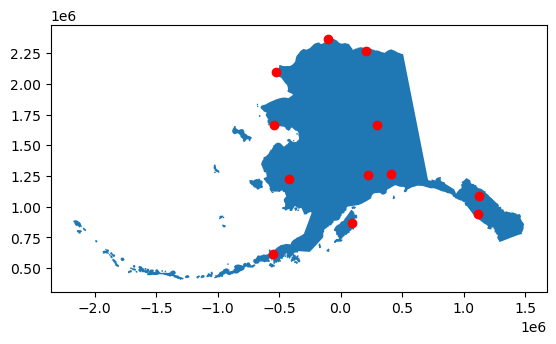

In [16]:
fig, ax = plt.subplots()

alaska.plot(ax=ax)
ak_places.plot(ax=ax, color='red')

plt.show()

## Prepare roads 

### Exploration
Now we move on to our roads dataset. 

In [17]:
# print the CRS
print(roads.crs)

# look at first five columns
roads.head(3)

epsg:4326


,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,question,length_km,toll,ne_part,label,label2,local,localtype,localalt,labelrank,ignore,add,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label,geometry
0,8,Road,Secondary Highway,CAN,None,"Version 1.5: Changed alignment, a few adds in ...",None,None,None,None,0,3,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,314705,North America,0,None,7.1,9.6,"LINESTRING (-133.32533 62.21571, -133.31664 62..."
1,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",83,None,None,None,0,164,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,108105,North America,0,Federal,7.0,8.6,"LINESTRING (-100.50543 42.80753, -100.53495 42..."
2,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",840,None,None,None,0,98,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,0,North America,0,U/C,7.0,9.5,"LINESTRING (-87.27432 36.02439, -87.22916 35.9..."


<AxesSubplot:>

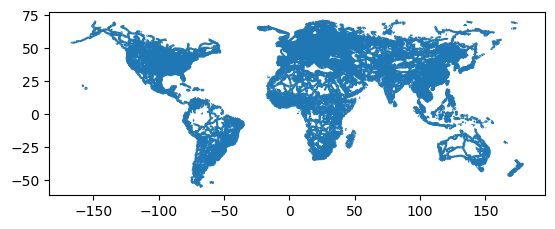

In [18]:
roads.plot()

`roads` is not in the same CRS as `alaska`, so we these geo-datasets shound't interact until they're in the same CRS. 

### Data selection

Before reprojecting and clipping, let's subset the data to select only US roads.

*Geospatial operations are usually costly. 
The more detailed our geometries the longer in takes to do geospatial computations. 
It's a good practice to try to reduce your data as much as possible before applying any geospatial transformation.*


<AxesSubplot:>

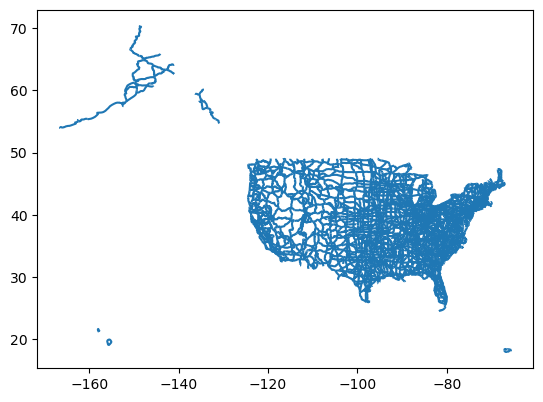

In [19]:
usa_roads = roads[roads.sov_a3 == 'USA']
usa_roads.plot()

### Clipping with bounding box
Clip the `usa_roads` geo-dataframe with the bounding box of `alaska` instead of its polygons. 

To create a bounding box, first use the `box()` function we imported from `shapely.geometry`
General syntax :
```python
box(minx, miny, maxx, maxy)
```
the output is a X representing a box constructed like this: *make diagram*

If we want to create a shapely polygon from the bbounds of a geo-dataframe `gdf`, a more straightforward syntax is:
```python 
box(*gdf.total_bounds)
```

In [20]:
# an array with the minx, miny, maxx, maxy coordinates of the bounding box 
alaska.total_bounds

array([-2175729.73162241,   404545.10791528,  1493082.30904445,
        2383808.43520816])

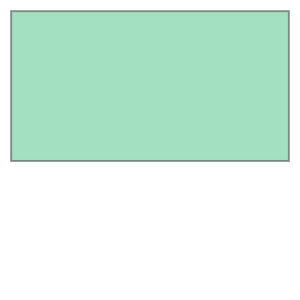

In [21]:
bbox = box(*alaska.total_bounds)
bbox

In the previous code we use the asterisk `*` as an **unpacking operator** on the array `gdf.total_bounds`. 
Think about it as unpacking the elements of `gdf.total_bounds` and assigning them one-by-one to the paremeters `minx, miny, maxx, maxy` of `box()`

Now we need to make a geo-dataframe with our box:

In [22]:
ak_bbox = gpd.GeoDataFrame(geometry=[bbox],
                           crs=alaska.crs)
ak_bbox

,geometry
0,"POLYGON ((1493082.309 404545.108, 1493082.309 ..."


<AxesSubplot:>

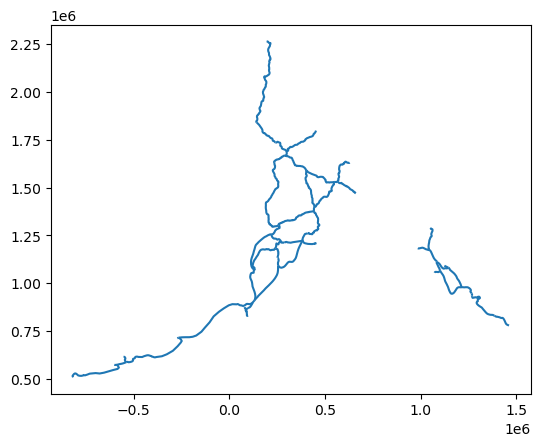

In [23]:
ak_complete_roads = gpd.clip(usa_roads.to_crs(ak_bbox.crs), ak_bbox)
ak_complete_roads.plot()

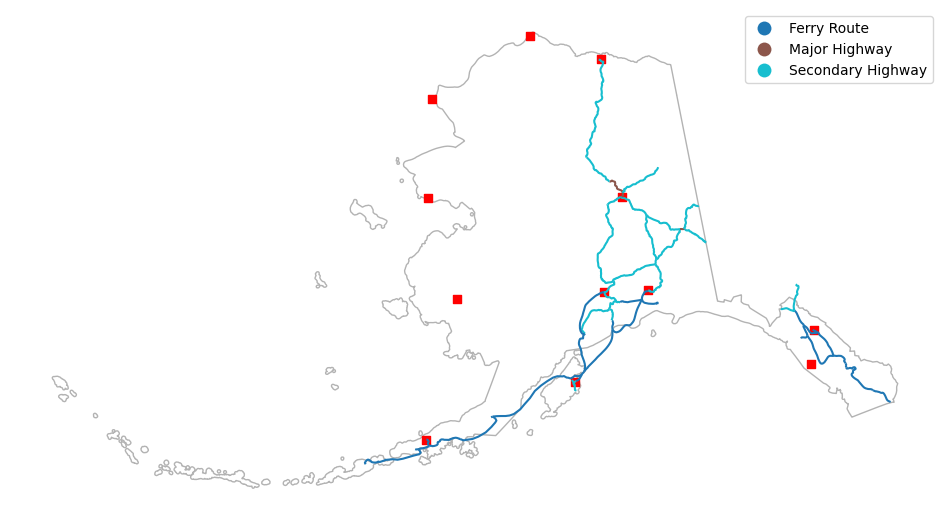

In [24]:
# FINISH WITH PLOT:

# https://matplotlib.org/stable/api/markers_api.html
# Trouble: not in the same CRS
# this is cool! but now we are seeing all Arctic comms
fig, ax = plt.subplots(figsize=(12,8))
# --------------------------
ax.axis('off')

alaska.plot(ax=ax, color='none', edgecolor='0.7')
ak_complete_roads.plot(ax=ax, column='type', legend=True)
#ak_comms.plot(ax=ax, color='red')
ak_places.plot(ax=ax, color='red', marker='s')

# --------------------------

plt.show()
# a comment to create a change